In [1]:
import numpy as np
import pickle
from matplotlib.animation import FFMpegWriter
import cv2 
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import torch
from plot_util import *
import os
import liftpose.legacy.utils as utils
import liftpose.legacy.stats as stat

In [2]:
idx = 0
data_dir = r'\Users\NeLy\Desktop\mouse_prism\mouse_prism'
out_dir = 'out'

#mousetracker
#files = sorted(glob.glob(os.path.join(data_dir, '*.pkl')))
video = 'G6AE1_100_27_1_control_S3T12.avi'
poses = pickle.load(open(os.path.join(data_dir, 'G6AE1_100_27_1_control_S3T12.pkl'),'rb'))
index = poses['index']

out_dir = './out'
#LiftPose3D prediction
data = torch.load(os.path.join(out_dir, 'test_results.pth.tar'))
tar_mean = torch.load(os.path.join(out_dir, 'stat_3d.pth.tar'))['mean']
tar_std = torch.load(os.path.join(out_dir, 'stat_3d.pth.tar'))['std']
targets_1d = torch.load(os.path.join(out_dir, 'stat_3d.pth.tar'))['targets_3d']
tar_offset = np.vstack(torch.load(os.path.join(out_dir, 'stat_3d.pth.tar'))['offset'].values())
good_keypts = utils.add_roots(data['good_keypts'],targets_1d,len(tar_mean)).astype(bool)

inp_mean = torch.load(os.path.join(out_dir, 'stat_2d.pth.tar'))['mean']
inp_std = torch.load(os.path.join(out_dir, 'stat_2d.pth.tar'))['std']
targets_2d = torch.load(os.path.join(out_dir, 'stat_2d.pth.tar'))['targets_2d']
inp_offset = np.vstack(torch.load(os.path.join(out_dir, 'stat_2d.pth.tar'))['offset'].values())

tar = stat.unNormalize(data['target'], tar_mean[targets_1d], tar_std[targets_1d])
tar = utils.add_roots(tar,targets_1d,len(tar_mean))
tar += tar_offset
out = stat.unNormalize(data['output'], tar_mean[targets_1d], tar_std[targets_1d])
out = utils.add_roots(out,targets_1d,len(tar_mean))
out += tar_offset
inp = stat.unNormalize(data['input'], inp_mean[targets_2d], inp_std[targets_2d])
inp = utils.add_roots(inp,targets_2d,len(inp_mean))
inp += inp_offset

#images
imgs = video_to_imgs(video)
imgs = [rgb2gray(im) for im in imgs]
imgs = [undistort(im,poses['distort'].flatten()) for im in imgs]

C:\Users\NeLy\Anaconda\envs\liftpose2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\NeLy\Anaconda\envs\liftpose2\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:23<00:00, 16.82it/s]


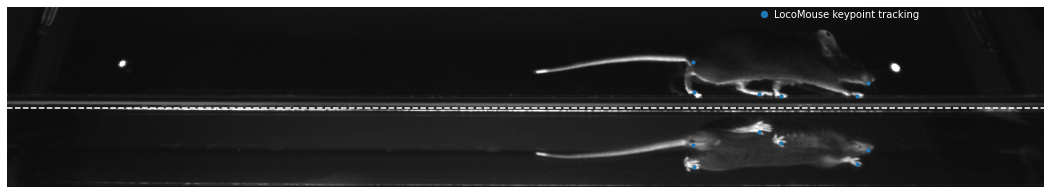

In [3]:
fig = plt.figure(figsize=(15,2.5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

chosen_keypts = [0,1,2,3,4,5,6]

inp[inp==0]=np.NaN
out[out==0]=np.NaN
tar[tar==0]=np.NaN

bottom_x, bottom_y = inp[:,::2], inp[:,1::2]
side_x, side_y = inp[:,::2], tar
side_x_pred, side_y_pred = inp[:,::2], out

bottom_x, bottom_y = bottom_x[:,chosen_keypts], bottom_y[:,chosen_keypts]
side_x, side_y = side_x[:,chosen_keypts], side_y[:,chosen_keypts]
side_x_pred, side_y_pred = side_x_pred[:,chosen_keypts], side_y_pred[:,chosen_keypts]
good_keypts = good_keypts[:,chosen_keypts]
            
writer = FFMpegWriter(fps=25)
with writer.saving(fig, "video_3.mp4", 100):
    for i in tqdm(range(0,400)):  
        
        plt.cla()

        plt.imshow(imgs[index[i]],cmap='gray', vmin=0, vmax=255)
        plt.axhline(140, color="white", linestyle="--")
        
        plt.scatter(bottom_x[i,good_keypts[i,:]], bottom_y[i,good_keypts[i,:]],s=10,c='C0')
        plt.scatter(side_x[i,good_keypts[i,:]], side_y[i,good_keypts[i,:]],s=10,c='C0')
        #plt.scatter(side_x_pred[i,good_keypts[i,:]], side_y_pred[i,good_keypts[i,:]],s=10,c='C1')
                         
        plt.scatter(1050,10, marker = "o", c='C0', s = 40)
        #plt.scatter(1050,30, marker = "o", c='C1', s = 40)
        plt.text(1065, 15, 'LocoMouse keypoint tracking', fontsize=10, color='white')
        #plt.text(1065, 35, 'LiftPose3D prediction using only the ventral view', fontsize=10, color='white')
        
        #plt.text(120, 80, str(i), fontsize=50, color='white')
        
        plt.axis('off')
        writer.grab_frame()    

Text(1065, 35, 'LiftPose3D prediction using only the ventral view')

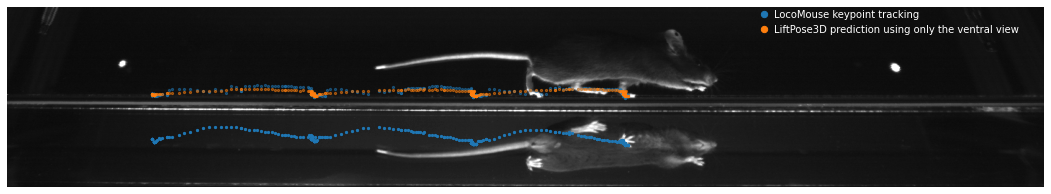

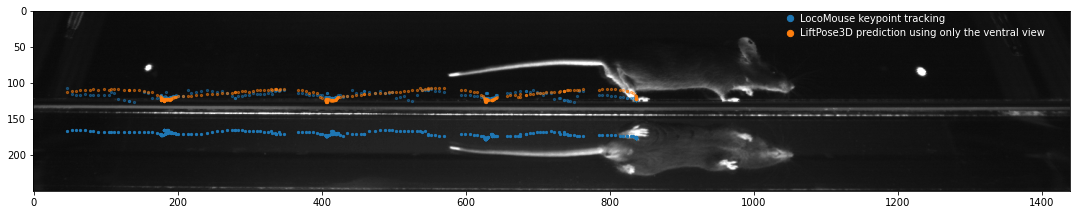

In [4]:

fig = plt.figure(figsize=(15,2.5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

i=0
chosen_keypts = [2]

inp[inp==0]=np.NaN
out[out==0]=np.NaN
tar[tar==0]=np.NaN

bottom_x, bottom_y = inp[:,::2], inp[:,1::2]
side_x, side_y = inp[:,::2], tar
side_x_pred, side_y_pred = inp[:,::2], out

bottom_x, bottom_y = bottom_x[:,chosen_keypts], bottom_y[:,chosen_keypts]
side_x, side_y = side_x[:,chosen_keypts], side_y[:,chosen_keypts]
side_x_pred, side_y_pred = side_x_pred[:,chosen_keypts], side_y_pred[:,chosen_keypts]

plt.imshow(imgs[index[300]],cmap='gray', vmin=0, vmax=255)
plt.scatter(bottom_x[:300,good_keypts[i,chosen_keypts]], bottom_y[:300,good_keypts[i,chosen_keypts]],s=5,c='C0')
plt.scatter(side_x[:300,good_keypts[i,chosen_keypts]], side_y[:300,good_keypts[i,chosen_keypts]],s=5,c='C0',alpha=0.5)
plt.scatter(side_x_pred[:300,good_keypts[i,chosen_keypts]], side_y_pred[:300,good_keypts[i,chosen_keypts]],s=5,c='C1',alpha=0.5)

plt.scatter(1050,10, marker = "o", c='C0', s = 40)
plt.scatter(1050,30, marker = "o", c='C1', s = 40)
plt.text(1065, 15, 'LocoMouse keypoint tracking', fontsize=10, color='white')
plt.text(1065, 35, 'LiftPose3D prediction using only the ventral view', fontsize=10, color='white')

plt.axis('off')

#plt.savefig('good_paw.svg')

fig = plt.figure(figsize=(15,2.5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

chosen_keypts = [3]

inp[inp==0]=np.NaN
out[out==0]=np.NaN
tar[tar==0]=np.NaN

bottom_x, bottom_y = inp[:,::2], inp[:,1::2]
side_x, side_y = inp[:,::2], tar
side_x_pred, side_y_pred = inp[:,::2], out

bottom_x, bottom_y = bottom_x[:,chosen_keypts], bottom_y[:,chosen_keypts]
side_x, side_y = side_x[:,chosen_keypts], side_y[:,chosen_keypts]
side_x_pred, side_y_pred = side_x_pred[:,chosen_keypts], side_y_pred[:,chosen_keypts]

plt.imshow(imgs[index[330]],cmap='gray', vmin=0, vmax=255)
plt.scatter(bottom_x[:330,good_keypts[i,chosen_keypts]], bottom_y[:330,good_keypts[i,chosen_keypts]],s=5,c='C0')
plt.scatter(side_x[:330,good_keypts[i,chosen_keypts]], side_y[:330,good_keypts[i,chosen_keypts]],s=5,c='C0',alpha=0.5)
plt.scatter(side_x_pred[:330,good_keypts[i,chosen_keypts]], side_y_pred[:330,good_keypts[i,chosen_keypts]],s=5,c='C1',alpha=0.5)

plt.scatter(1050,10, marker = "o", c='C0', s = 40)
plt.scatter(1050,30, marker = "o", c='C1', s = 40)
plt.text(1065, 15, 'LocoMouse keypoint tracking', fontsize=10, color='white')
plt.text(1065, 35, 'LiftPose3D prediction using only the ventral view', fontsize=10, color='white')

#plt.axis('off')

#plt.savefig('bad_paw.svg')